<a href="https://colab.research.google.com/github/safeai-snu/Econometrics/blob/main/Ch3.3.ARIMA_errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2.1. Stochastic and Deterministic Trend

### 결정적 추세와 확률적 추세에 따른 호주 비행기 탑승객 수 추정

#### 모듈과 데이터 불러오기

In [1]:
#모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [8]:
#데이터 불러오기
aus_airpassengers = pd.read_csv('https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.4/aus_airpassengers.csv')
aus_airpassengers['Year'] = pd.to_datetime(aus_airpassengers['Year'], format='%Y')
aus_airpassengers.index = aus_airpassengers['Year']
aus_airpassengers = aus_airpassengers[['Passengers']]
aus_airpassengers

,Passengers
Year,
1970-01-01,7.318700
1971-01-01,7.326600
1972-01-01,7.795600
1973-01-01,9.384600
1974-01-01,10.664700
1975-01-01,11.055100
1976-01-01,10.864300
1977-01-01,11.306500
1978-01-01,12.122300


#### 호주 비행기 탑승객 수 시각화

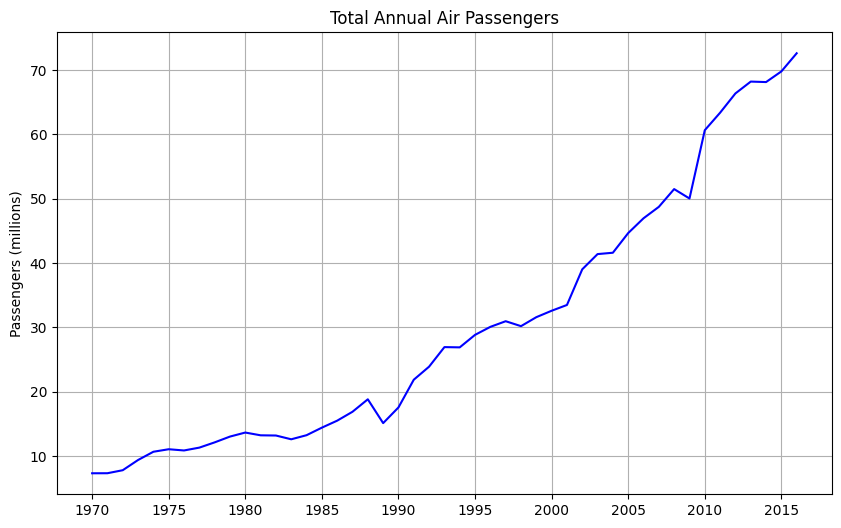

In [9]:
#데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(aus_airpassengers,  color='b')

plt.ylabel('Passengers (millions)')
plt.title('Total Annual Air Passengers')
plt.grid(True)

plt.show()

#### 각 추세에 대한 모델 적합 결과

In [10]:
#결정적 추세 모델 적합
time_trend = np.arange(len(aus_airpassengers))
model_deterministic = SARIMAX(aus_airpassengers['Passengers'], exog=time_trend, order=(1, 0, 0), trend='n', simple_differencing=False)
fit_deterministic = model_deterministic.fit(disp=False)

fit_deterministic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   47
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -100.943
Date:                Fri, 03 Jan 2025   AIC                            207.886
Time:                        03:06:50   BIC                            213.437
Sample:                    01-01-1970   HQIC                           209.975
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4606      0.257      5.674      0.000       0.956       1.965
ar.L1          0.9545      0.078     12.294      0.000       0.802       1.107
sigma2         4.0799      0.504      8.093      0.000       3.092       5.068
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               118.63
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.69   Skew:                             1.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
#확률적 추세 모델 적합
model_stochastic = SARIMAX(aus_airpassengers['Passengers'], order=(0, 1, 0), trend='c', simple_differencing=False)
fit_stochastic = model_stochastic.fit(disp=False)

fit_stochastic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                   47
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -98.156
Date:                Fri, 03 Jan 2025   AIC                            200.311
Time:                        03:06:52   BIC                            203.969
Sample:                    01-01-1970   HQIC                           201.681
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4191      0.367      3.866      0.000       0.700       2.139
sigma2         4.1777      0.489      8.552      0.000       3.220       5.135
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               129.55
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               6.63   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### 모델을 이용한 예측

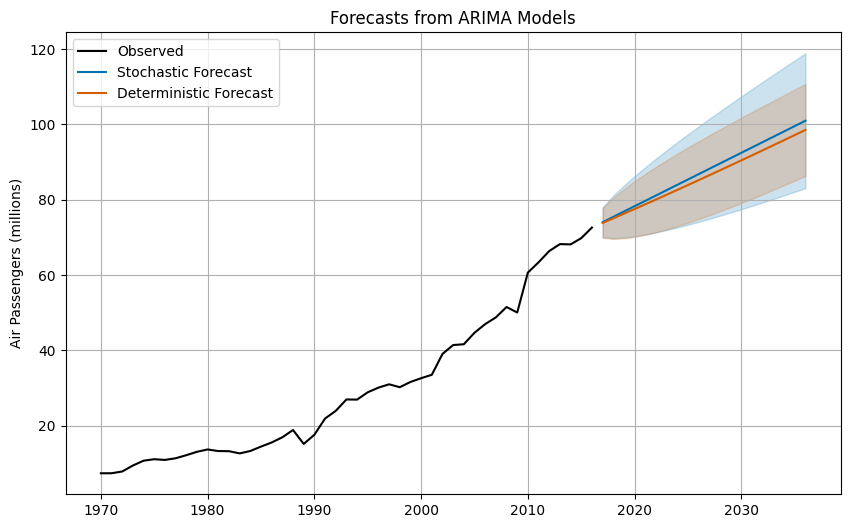

In [12]:
#결정적 추세 모델 예측
future_trend = np.arange(len(aus_airpassengers), len(aus_airpassengers) + 20)
forecast_deterministic = fit_deterministic.get_forecast(steps=20, exog=future_trend)
forecast_deterministic_mean = forecast_deterministic.predicted_mean
forecast_deterministic_ci = forecast_deterministic.conf_int(alpha=0.05)

#확률적 추세 모델 예측
forecast_stochastic = fit_stochastic.get_forecast(steps=20)
forecast_stochastic_mean = forecast_stochastic.predicted_mean
forecast_stochastic_ci = forecast_stochastic.conf_int(alpha=0.05)

#예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(aus_airpassengers.index, aus_airpassengers['Passengers'], label='Observed', color='black')

plt.plot(forecast_stochastic_mean, label='Stochastic Forecast', color='#0072B2')
plt.fill_between(forecast_stochastic_mean.index,
                 forecast_stochastic_ci.iloc[:, 0],
                 forecast_stochastic_ci.iloc[:, 1],
                 color='#0072B2', alpha=0.2)

plt.plot(forecast_deterministic_mean, label='Deterministic Forecast', color='#D55E00')
plt.fill_between(forecast_deterministic_mean.index,
                 forecast_deterministic_ci.iloc[:, 0],
                 forecast_deterministic_ci.iloc[:, 1],
                 color='#D55E00', alpha=0.2)

plt.ylabel('Air Passengers (millions)')
plt.title('Forecasts from ARIMA Models')
plt.legend()
plt.grid(True)
plt.show()

# 4.2.3. 기타 유용한 모델

## 동적 조화 회귀(Dynamic Harmonic Regression)

### 호주 식음료 서비스 재고율 추정

#### 모듈과 데이터 불러오기

In [13]:
#모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

In [17]:
#데이터 불러오기
aus_retail = pd.read_csv("https://raw.githubusercontent.com/safeai-snu/Econometrics/main/dataset/Ch.4/aus_retail.csv", index_col=0)
aus_retail

0.00016836297275978242


### 2) 최적의 ARIMA(p, d, q) 모델 선택

In [18]:
#오차 차수 최적화하기
result = ARIMAX_optimizer(us_change["Consumption"][:193], us_change[ ["Income", "Production", "Savings", "Unemployment"] ][:193])
result

,p,q,AIC
0,2,3,114.373086
1,3,2,115.388935
2,3,3,122.280935
3,2,1,133.476591
4,3,1,144.519662
5,3,0,144.711342
6,2,0,146.763177
7,0,2,149.045441
8,1,1,150.019959
9,1,2,150.599096


### 3) 모델 적합

In [19]:
#실제 모델 적합
model = SARIMAX(us_change["Consumption"][:193], us_change[ ["Income", "Production", "Savings", "Unemployment"] ][:193], order=(2, 0, 3), simple_differencing=False)
fit = model.fit(disp=False)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                  193
Model:               SARIMAX(2, 0, 3)   Log Likelihood                 -47.187
Date:                Tue, 31 Dec 2024   AIC                            114.373
Time:                        16:35:41   BIC                            147.000
Sample:                    01-01-1970   HQIC                           127.586
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Income           0.7504      0.030     25.042      0.000       0.692       0.809
Production       0.0423      0.028      1.486      0.137      -0.013       0.098
Savings         -0.0532      0.002    -27.074      0.000      -0.057      -0.049
Unemployment    -0.1860      0.141     -1.322      0.186      -0.462       0.090
ar.L1            0.0250      0.054      0.461      0.645      -0.081       0.131
ar.L2            0.9741      0.054     18.026      0.000       0.868       1.080
ma.L1           -0.1111      0.080     -1.396      0.163      -0.267       0.045
ma.L2           -0.9272      0.081    -11.461      0.000      -1.086      -0.769
ma.L3            0.0848      0.071      1.195      0.232      -0.054       0.224
sigma2           0.0941      0.008     11.105      0.000       0.077       0.111
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                22.84
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.36
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 4) 모델을 이용한 예측

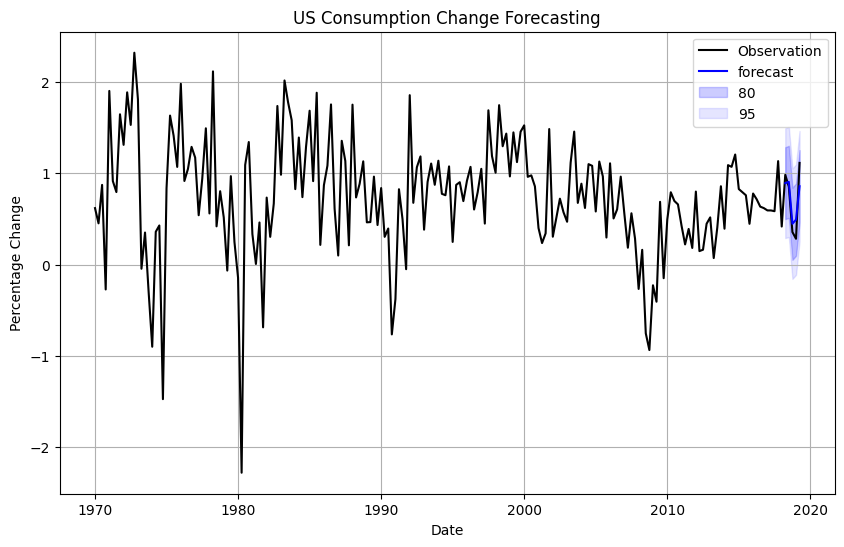

In [20]:
#ARIMAX 예측값 구하기기
forecast_result = fit.get_forecast(5, exog=us_change[ ["Income", "Production", "Savings", "Unemployment"] ].iloc[193:])
forecast_mean = forecast_result.predicted_mean
lower_ci80 = forecast_result.conf_int(alpha=0.2).iloc[:,0]
upper_ci80 = forecast_result.conf_int(alpha=0.2).iloc[:,1]
lower_ci95 = forecast_result.conf_int(alpha=0.05).iloc[:,0]
upper_ci95 = forecast_result.conf_int(alpha=0.05).iloc[:,1]

#예측 시각화
plt.figure(figsize=(10, 6))
plt.plot(us_change["Consumption"], label='Observation', color='black')
plt.plot(forecast_mean, label='forecast', color='b')
plt.fill_between(forecast_mean.index, lower_ci80, upper_ci80, label='80', color='b', alpha=.2)
plt.fill_between(forecast_mean.index, lower_ci95, upper_ci95, label='95', color='b', alpha=.1)
plt.xlabel("Date")
plt.ylabel("Percentage Change")
plt.title("US Consumption Change Forecasting")
plt.grid(True)
plt.legend()
plt.show()